![alt text](Enunciado.png)

[[ 1. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  1.]]

Autovalores λ (omega²):
[0.0000e+00 1.0000e-03 3.9000e-03 8.9000e-03 1.5800e-02 2.4600e-02
 3.5400e-02 4.8200e-02 6.2800e-02 7.9400e-02 9.7900e-02 1.1820e-01
 1.4040e-01 1.6450e-01 1.9030e-01 2.1800e-01 2.4740e-01 2.7850e-01
 3.1130e-01 3.4580e-01 3.8200e-01 4.1970e-01 4.5900e-01 4.9980e-01
 5.4210e-01 5.8580e-01 6.3090e-01 6.7740e-01 7.2520e-01 7.7420e-01
 8.2440e-01 8.7580e-01 9.2830e-01 9.8190e-01 1.0365e+00 1.0920e+00
 1.1484e+00 1.2057e+00 1.2638e+00 1.3225e+00 1.3820e+00 1.4420e+00
 1.5026e+00 1.5637e+00 1.6252e+00 1.6871e+00 1.7493e+00 1.8118e+00
 1.8744e+00 1.9372e+00 2.0000e+00 2.0628e+00 2.1256e+00 2.1882e+00
 2.2507e+00 2.3129e+00 2.3748e+00 2.4363e+00 2.4974e+00 2.5580e+00
 2.6180e+00 2.6775e+00 2.7362e+00 2.7943e+00 2.8516e+00 2.9080e+00
 2.9635e+00 3.0181e+00 3.0717e+00 3.1242e+00 3

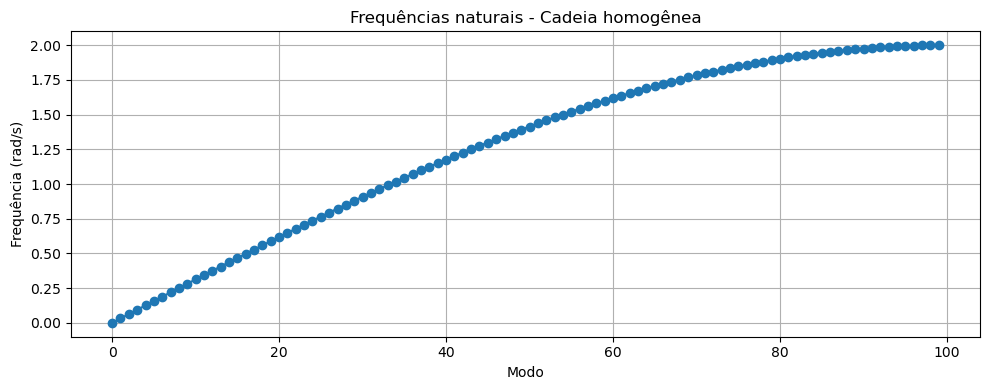

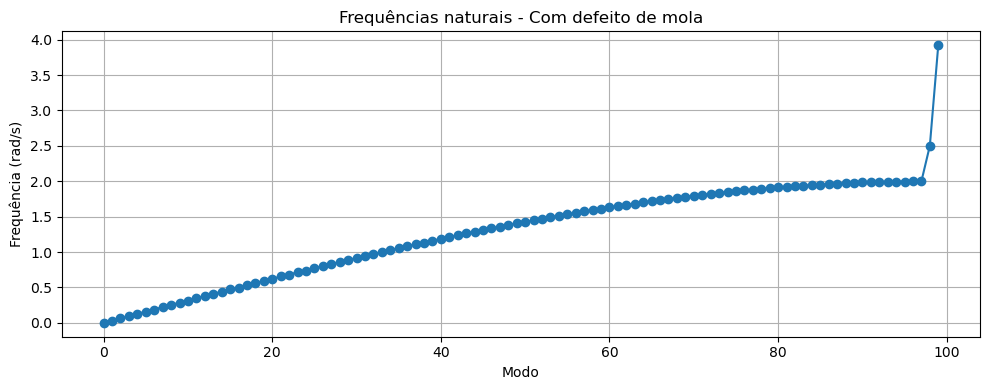

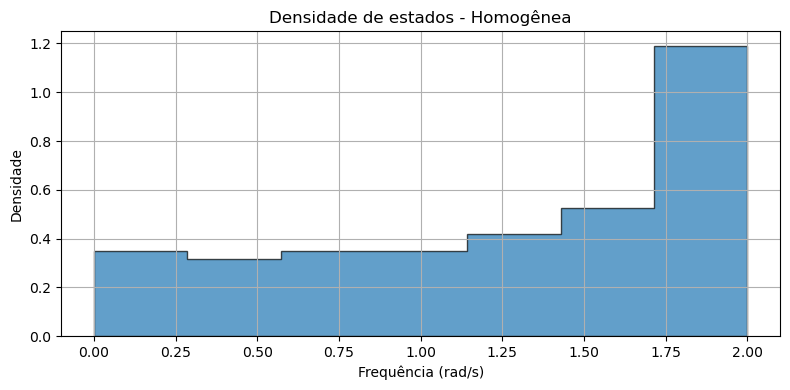

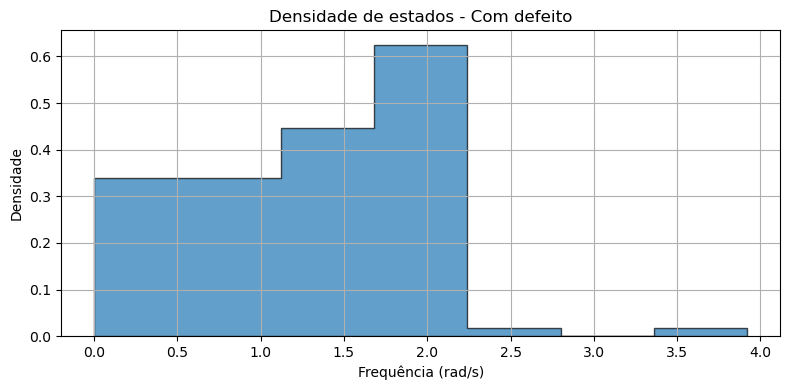

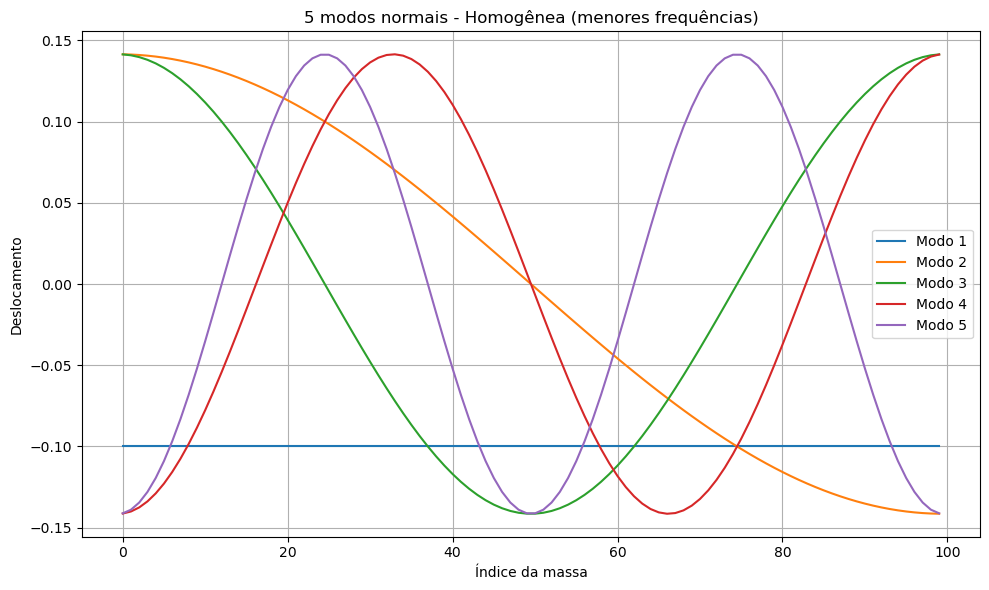

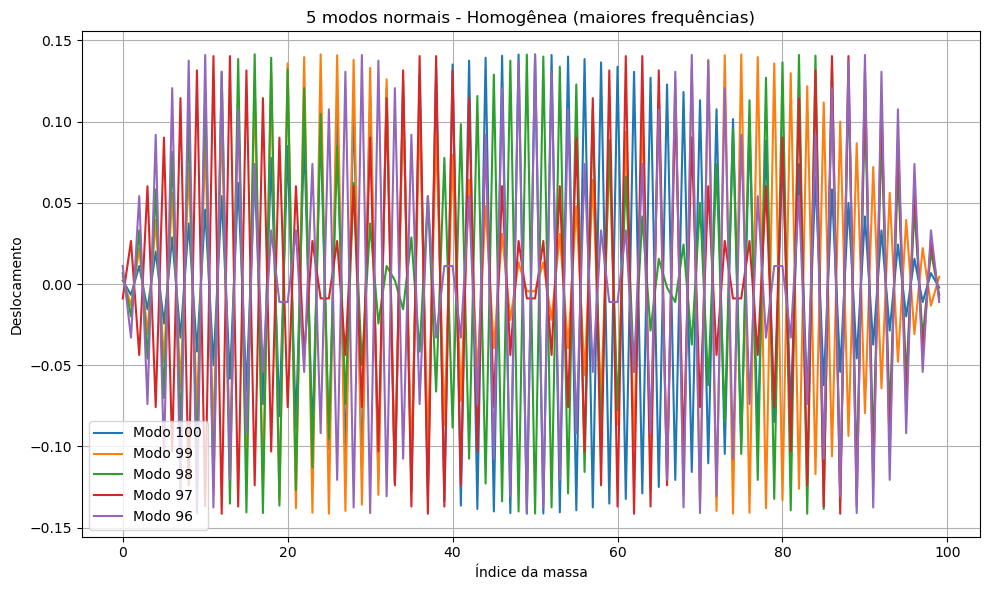

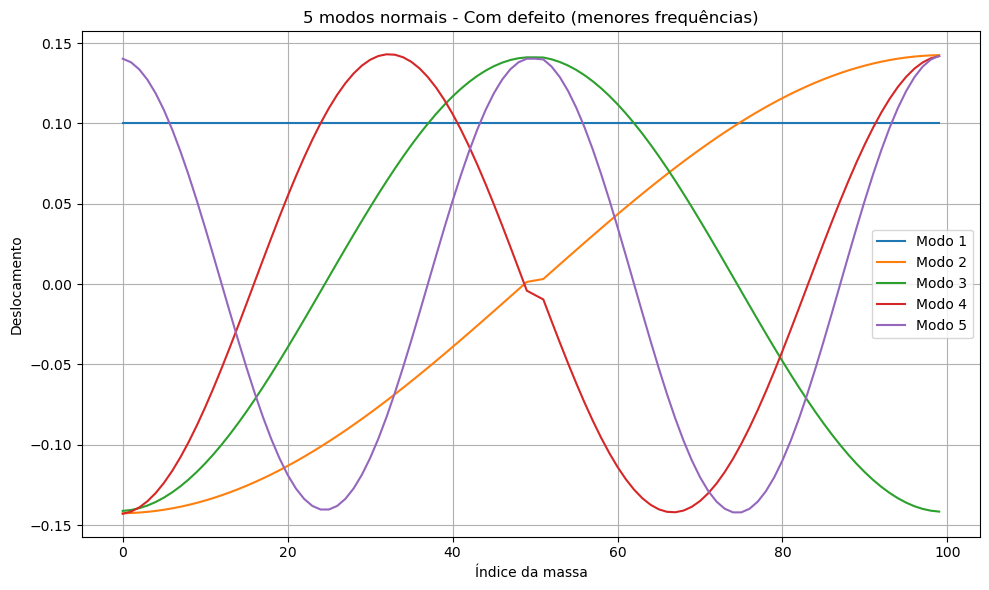

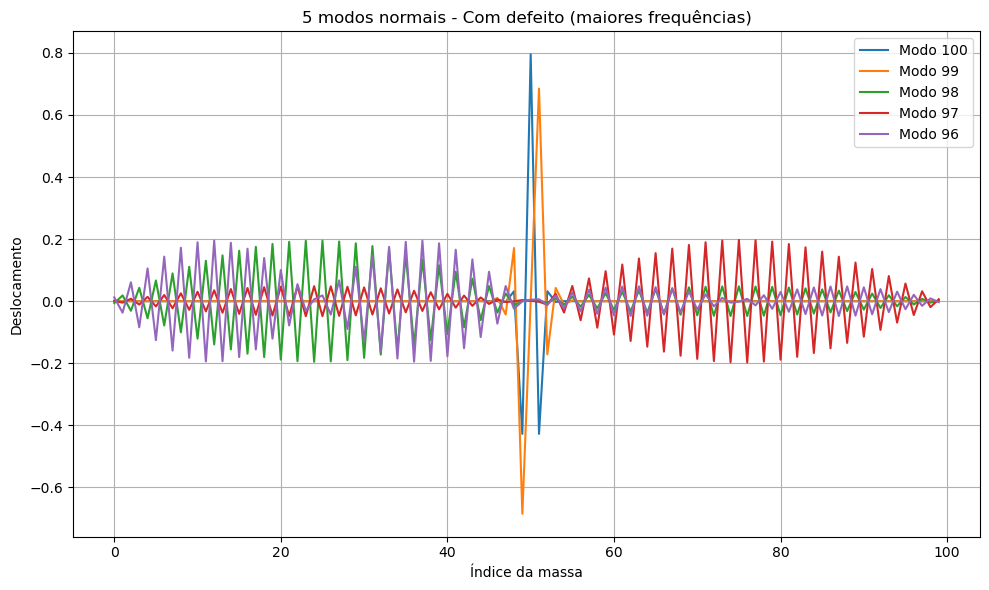

In [16]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Parâmetros
N = 100
m = 1.0
k = 1.0
k2 = 5.0
masses = np.ones(N) * m

def construir_D(k_values, masses):
    N = len(masses)
    D = np.zeros((N, N))
    
    for i in range(N):
        if i > 0:
            D[i, i] += k_values[i-1] / masses[i]
            D[i, i-1] = -k_values[i-1] / masses[i]
        if i < N - 1:
            D[i, i] += k_values[i] / masses[i]
            D[i, i+1] = -k_values[i] / masses[i]
            
    return D

# ---------- CASO 1: Homogêneo ----------
k_values_h = np.ones(N - 1) * k
D_h = construir_D(k_values_h, masses)
print(D_h)

eigvals_h, eigvecs_h = eig(D_h)
eigvals_h = np.real(eigvals_h)
eigvals_h[eigvals_h < 0] = 0
frequencias_h = np.sqrt(eigvals_h)
idx_h = np.argsort(frequencias_h)
frequencias_h = frequencias_h[idx_h]
eigvecs_h = np.real(eigvecs_h[:, idx_h])

print("\nAutovalores λ (omega²):")
print(np.round(eigvals_h[idx_h], 4))

print("\nAutovetor:")
print(np.round(eigvecs_h, 4))  

# ---------- CASO 2: Com defeito ----------
k_values_d = np.ones(N - 1) * k
center = N // 2
k_values_d[center - 1] = k2
k_values_d[center] = k2
D_d = construir_D(k_values_d, masses)

eigvals_d, eigvecs_d = eig(D_d)
eigvals_d = np.real(eigvals_d)
eigvals_d[eigvals_d < 0] = 0
frequencias_d = np.sqrt(eigvals_d)
idx_d = np.argsort(frequencias_d)
frequencias_d = frequencias_d[idx_d]
eigvecs_d = np.real(eigvecs_d[:, idx_d])

print("\nAutovalores com defeito λ (omega²):")
print(np.round(eigvals_d[idx_d], 4))

print("\nAutovetor com defeito:")
print(np.round(eigvecs_d, 4))  

# ---------- PLOTS DE FREQUÊNCIA ----------
plt.figure(figsize=(10, 4))
plt.plot(frequencias_h, 'o-', label='Homogênea')
plt.title('Frequências naturais - Cadeia homogênea')
plt.xlabel('Modo')
plt.ylabel('Frequência (rad/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(frequencias_d, 'o-', label='Com defeito')
plt.title('Frequências naturais - Com defeito de mola')
plt.xlabel('Modo')
plt.ylabel('Frequência (rad/s)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- HISTOGRAMAS ----------
plt.figure(figsize=(8, 4))
plt.hist(frequencias_h, bins=7, density=True, histtype='stepfilled',
         edgecolor='k', alpha=0.7)
plt.title('Densidade de estados - Homogênea')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Densidade')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(frequencias_d, bins=7, density=True, histtype='stepfilled',
         edgecolor='k', alpha=0.7)
plt.title('Densidade de estados - Com defeito')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Densidade')
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- MODOS NORMAIS ----------
# Homogênea - 5 menores frequências
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(eigvecs_h[:, i], label=f'Modo {i+1}')
plt.title('5 modos normais - Homogênea (menores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Homogênea - 5 maiores frequências
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    plt.plot(eigvecs_h[:, -i], label=f'Modo {N-i+1}')
plt.title('5 modos normais - Homogênea (maiores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Defeito - 5 menores frequências
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(eigvecs_d[:, i], label=f'Modo {i+1}')
plt.title('5 modos normais - Com defeito (menores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Defeito - 5 maiores frequências
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    plt.plot(eigvecs_d[:, -i], label=f'Modo {N-i+1}')
plt.title('5 modos normais - Com defeito (maiores frequências)')
plt.xlabel('Índice da massa')
plt.ylabel('Deslocamento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
